In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import datetime
import geopandas as gp
from scipy import stats, integrate
import seaborn as sns
#Adjusts what can be displayed when calling a pandas dataframe|
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [2]:
HERE = pd.read_csv('data/MOW_Path_Speed_5Min_2014_DOW_SpeedLimit.csv')
HERE['MEAN'] = HERE['MEAN']*0.6213
HERE.head()

,LINK_DIR,DATE_TIME,EPOCH_5MIN,LENGTH,SPDLIMIT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,PCT_5,PCT_50,PCT_85,DOW
0,998969850F,2014-01-01 13:55,167,186,72,37.8993,0.0,61,61,10,61,61,61,Wednesday
1,998969850F,2014-01-02 11:05,133,186,72,37.2780,0.0,60,60,10,60,60,60,Thursday
2,998969850F,2014-01-02 13:20,160,186,72,37.8993,0.0,61,61,10,61,61,61,Thursday
3,998969850F,2014-01-02 14:30,174,186,72,32.3076,0.0,52,52,10,52,52,52,Thursday
4,998969850F,2014-01-03 09:05,109,186,72,35.4141,0.0,57,57,10,57,57,57,Friday


In [3]:
R_to_A = gp.read_file('data/ManOWarShape/Richmond_Alumni_StatePlane.shp')
SB_to_T = gp.read_file('data/ManOWarShape/SirBarton_Todds_StatePlane.shp')
T_to_R = gp.read_file('data/ManOWarShape/Todds_Richmond_StatePlane.shp')
R_to_A.head()

,ADDR_TYPE,AR_AUTO,AR_BUS,AR_CARPOOL,AR_DELIV,AR_EMERVEH,AR_MOTOR,AR_PEDEST,AR_TAXIS,AR_TRAFF,AR_TRUCKS,BRIDGE,CONTRACC,COVERIND,DIRONSIGN,DIR_TRAVEL,DIVIDER,DIVIDERLEG,ENH_GEOM,EXITNAME,EXPAND_INC,EXPLICATBL,FEAT_ID,FERRY_TYPE,FROM_LANES,FRONTAGE,FULL_GEOM,FUNC_CLASS,INDESCRIB,INPROCDATA,INTERINTER,JUNCTIONNM,LANE_CAT,LINK_ID,LOW_MBLTY,L_ADDRFORM,L_ADDRSCH,L_AREA_ID,L_NREFADDR,L_NUMZONES,L_POSTCODE,L_REFADDR,LinkDir,MANOEUVRE,MAXATTR,MULTIDIGIT,NAMEONRDSN,NREF_IN_ID,NUM_AD_RNG,NUM_STNMES,N_SHAPEPNT,OBJECTID,PAVED,PHYS_LANES,POIACCESS,POSTALNAME,PRIORITYRD,PRIVATE,PUB_ACCESS,RAMP,REF_IN_ID,ROUNDABOUT,ROUTE_TYPE,R_ADDRFORM,R_ADDRSCH,R_AREA_ID,R_NREFADDR,R_NUMZONES,R_POSTCODE,R_REFADDR,SCENIC_NM,SCENIC_RT,SPECTRFIG,SPEED_CAT,STALENAME,ST_LANGCD,ST_NAME,ST_NM_BASE,ST_NM_PREF,ST_NM_SUFF,ST_TYP_AFT,ST_TYP_ATT,ST_TYP_BEF,Shape_Leng,TOLLWAY,TO_LANES,TRANS_AREA,TUNNEL,UNDEFTRAFF,URBAN,VANITYNAME,geometry
0,B,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N0,None,T,N,N,Y,N,None,Y,737455804,H,0,N,Y,4,N,N,N,N,1,107030477,2,N,O,21034526,4299,0,40517,4201,None,N,Y,Y,Y,210403745,1,1,8,1,Y,0,N,N,N,N,Y,N,46737978,N,None,None,None,21034526,None,0,40517,None,N,N,N,4,N,ENG,MAN O' WAR BLVD,MAN O' WAR,None,None,BLVD,N,None,1711.686896,N,2,N,N,N,N,N,LINESTRING (1580829.751393631 178659.766130894...
1,B,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N0,None,T,N,N,Y,N,None,Y,737455804,H,0,N,Y,4,N,N,N,N,1,111990715,2,N,O,21034526,4499,0,40517,4405,None,N,Y,Y,Y,46738019,1,1,12,2,Y,0,N,N,N,N,Y,N,229224366,N,None,None,None,21034526,None,0,40517,None,N,N,N,4,N,ENG,MAN O' WAR BLVD,MAN O' WAR,None,None,BLVD,N,None,1760.142818,N,2,N,N,N,N,N,LINESTRING (1582987.911119297 181109.446598976...
2,B,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N0,None,F,N,N,Y,N,None,Y,737455804,H,2,N,Y,4,N,N,N,N,1,111990717,2,None,None,21034526,None,0,40517,None,None,N,Y,Y,Y,46738020,1,1,12,3,Y,0,N,N,N,N,Y,N,229224367,N,None,N,E,21034526,4498,0,40517,4404,N,N,N,4,N,ENG,MAN O' WAR BLVD,MAN O' WAR,None,None,BLVD,N,None,1739.890652,N,0,N,N,N,N,N,LINESTRING (1583028.215828717 181091.151359975...
3,B,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N0,None,T,N,N,Y,N,None,Y,737455804,H,0,N,Y,4,N,N,N,N,1,111990719,2,N,O,21034526,4403,0,40517,4301,None,N,Y,Y,Y,229224366,1,1,11,4,Y,0,N,N,N,N,Y,N,210403745,N,None,None,None,21034526,None,0,40517,None,N,N,N,4,N,ENG,MAN O' WAR BLVD,MAN O' WAR,None,None,BLVD,N,None,1578.146844,N,2,N,N,N,N,N,LINESTRING (1581979.566679299 179920.844645470...
4,B,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,N,N0,None,F,N,N,Y,N,None,Y,737455804,H,2,N,Y,4,N,N,N,N,1,111990720,2,None,None,21034526,None,0,40517,None,None,N,Y,Y,Y,229224367,1,1,11,5,Y,0,N,N,N,N,Y,N,210403746,N,None,N,E,21034526,4402,0,40517,4300,N,N,N,4,N,ENG,MAN O' WAR BLVD,MAN O' WAR,None,None,BLVD,N,None,1593.313880,N,0,N,N,N,N,N,LINESTRING (1582008.321214974 179891.648509636...


In [4]:
#Function used to combine link ID with direction of travel to be the same as the HEREstats data
def LINK_DIR(x):
    for i in range(0,len(x)):
        x.loc[i,'LINK_DIR'] = str(x.loc[i,'LINK_ID'])+ str(x.loc[i,'DIR_TRAVEL'])
    return x['LINK_DIR']

In [5]:
RA_List = LINK_DIR(R_to_A)
SBT_List = LINK_DIR(SB_to_T)
TR_List = LINK_DIR(T_to_R)

In [6]:
RA_List

0    107030477T
1    111990715T
2    111990717F
3    111990719T
4    111990720F
5    111999151F
Name: LINK_DIR, dtype: object

In [7]:
SBT_List

0    107030561T
1    111986960F
2    111986961F
3    111989989T
4    111996193T
5    775719628F
6    775719629F
7    775719631T
8    775719632T
9    799468412F
Name: LINK_DIR, dtype: object

In [8]:
TR_List

0     27593407F
1    107030483F
2    107030484F
3    107030485T
4    107030486T
5    107030487T
6    107030488F
7    107034547T
8    107373569T
9    107373570F
Name: LINK_DIR, dtype: object

In [9]:
RA_Chart = HERE[HERE['LINK_DIR'].isin(RA_List)]
RA_Chart.LINK_DIR.unique()

array(['107030477T', '111999151F', '111990715T', '111990717F',
       '111990719T', '111990720F'], dtype=object)

In [10]:
SBT_Chart = HERE[HERE['LINK_DIR'].isin(SBT_List)]
SBT_Chart.LINK_DIR.unique()

array(['799468412F', '775719628F', '775719629F', '775719631T',
       '775719632T', '107030561T', '111996193T', '111989989T',
       '111986960F', '111986961F'], dtype=object)

In [11]:
TR_Chart = HERE[HERE['LINK_DIR'].isin(TR_List)]
TR_Chart.LINK_DIR.unique()

array(['27593407F', '107034547T', '107030484F', '107030485T', '107030486T',
       '107030487T', '107030488F', '107030483F', '107373570F', '107373569T'], dtype=object)

In [12]:
HERE = pd.DataFrame()

In [13]:
RA_Chart['Direction'] = RA_Chart['LINK_DIR'].str[-1:]

In [14]:
SBT_Chart['Direction'] = SBT_Chart['LINK_DIR'].str[-1:]

In [15]:
TR_Chart['Direction'] = TR_Chart['LINK_DIR'].str[-1:]

In [16]:
RA_Chart_T = RA_Chart[RA_Chart['Direction']=='T']
RA_Chart_F = RA_Chart[RA_Chart['Direction']=='F']

In [17]:
SBT_Chart_T = SBT_Chart[SBT_Chart['Direction']=='T']
SBT_Chart_F = SBT_Chart[SBT_Chart['Direction']=='F']

In [18]:
TR_Chart_T = TR_Chart[TR_Chart['Direction']=='T']
TR_Chart_F = TR_Chart[TR_Chart['Direction']=='F']

In [19]:
RA_Chart = pd.DataFrame()

In [20]:
SBT_Chart = pd.DataFrame()

In [21]:
TR_Chart = pd.DataFrame()

In [22]:
#w = Link, x = input dataframe, y = beginning timeframe (in epoch), z = ending timeframe (in epoch), 
#h = holiday (y or n), d = weekend or weekday
#Note the dataframe has to have an EPOCH_5MIN row to work.
#Also, this is ONLY for a single-link dataframe
def timeframe(x,y,z,h,d):
    us_holidays = ['2014-01-01', '2014-05-26', 
                   '2014-07-04', '2014-09-01', '2014-11-27', 
                   '2014-11-28', '2014-12-25']
    if h == True:
        x['DATE'] = x['DATE_TIME'].str.split(' ').str[0]
        r = x[x['DATE'].isin(us_holidays)]
        v = x[~x.isin(r)].dropna()
        days = v[v['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH_5MIN'] >= y) & (days['EPOCH_5MIN'] <= z)]
        return Timeframe
    else:
        x['DATE'] = x['DATE_TIME'].str.split(' ').str[0]
        days = x[x['DOW'].isin(d)]
        Timeframe = days[(days['EPOCH_5MIN'] >= y) & (days['EPOCH_5MIN'] <= z)]
        return Timeframe

In [23]:
#For now, enter the weekdays desire here in full
Weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Weekday

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [24]:
Weekend = ['Saturday','Sunday']
Weekend

['Saturday', 'Sunday']

In [25]:
Both = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Both

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [34]:
def createcharts(x,startepoch,endepoch,exclude_holidays_bool,DOW):
    Time = timeframe(x,startepoch,endepoch,exclude_holidays_bool,DOW)
    #sns.distplot(Time['MEAN'], kde = False, bins = 16)
    if endepoch-startepoch == 288:
        sns.distplot(Time['EPOCH_5MIN'], kde = False, bins = 8)
        sns.jointplot(x="EPOCH_5MIN", y="MEAN", data=Time, size = 6)
    else:
        sns.jointplot(x="EPOCH_5MIN", y="MEAN", data=Time, size = 6)

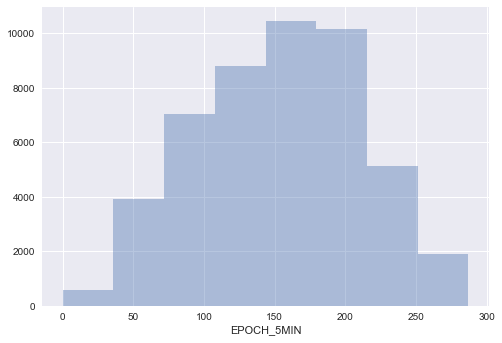

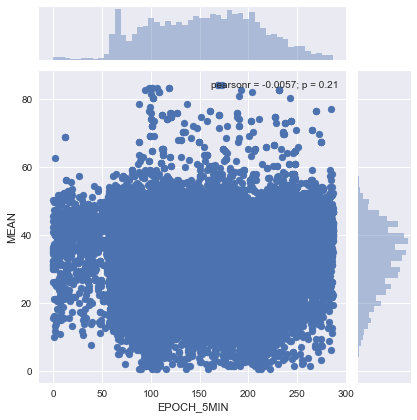

In [35]:
createcharts(RA_Chart_T,0,288,True,Weekday)

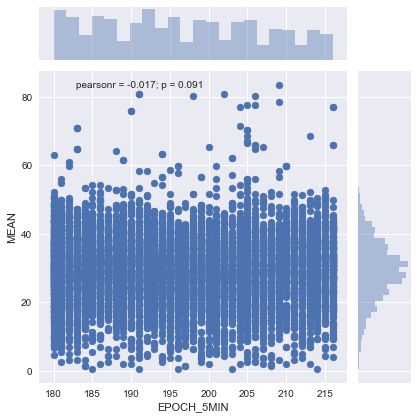

In [36]:
createcharts(RA_Chart_F,180,216,True,Weekday)

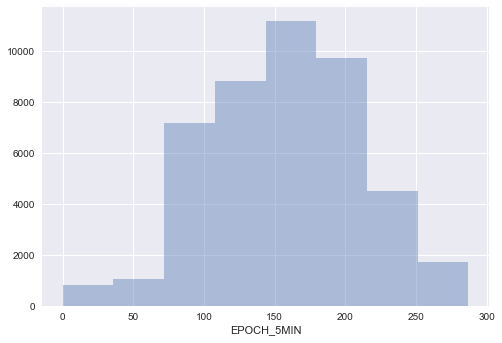

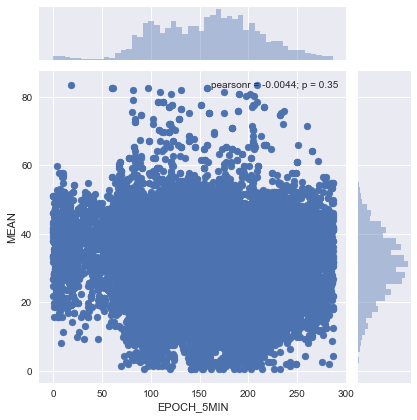

In [37]:
createcharts(RA_Chart_F,0,288,True,Weekday)

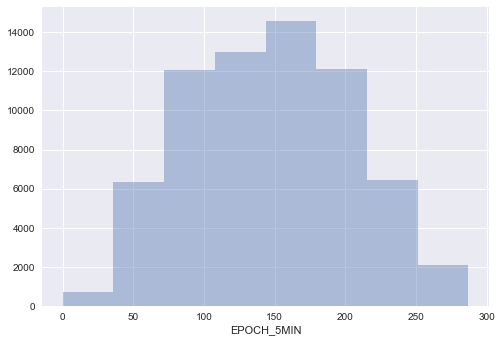

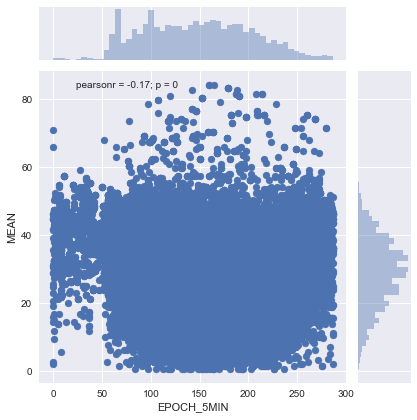

In [38]:
createcharts(SBT_Chart_T,0,288,True,Weekday)

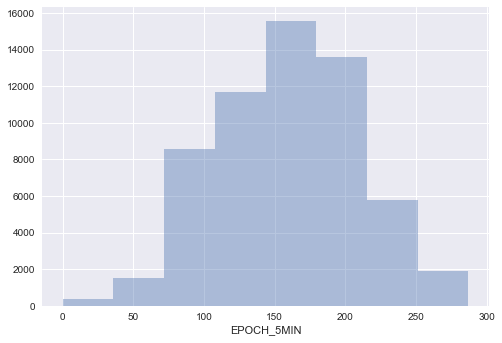

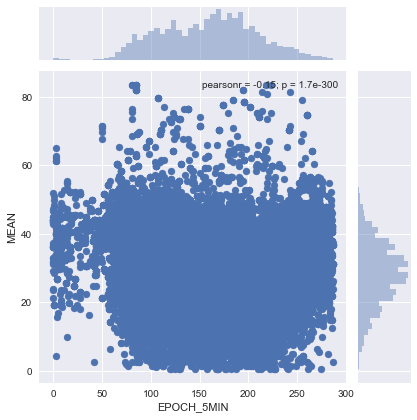

In [39]:
createcharts(SBT_Chart_F,0,288,True,Weekday)

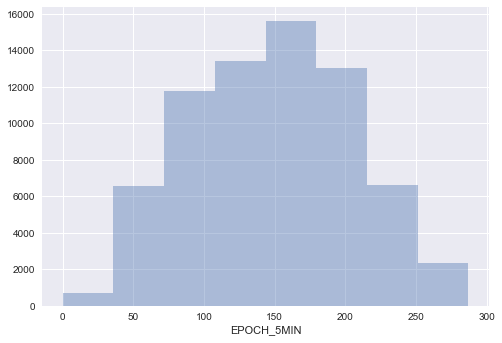

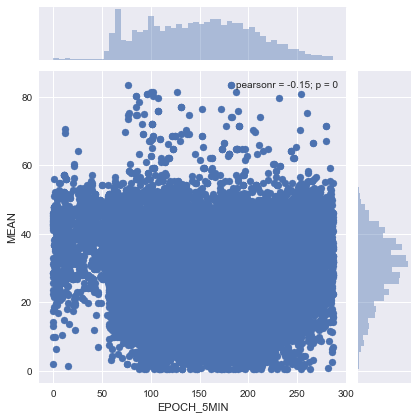

In [40]:
createcharts(TR_Chart_T,0,288,True,Weekday)

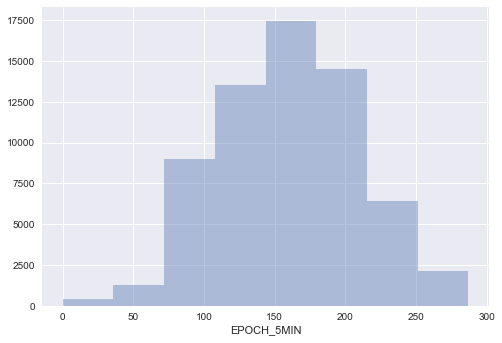

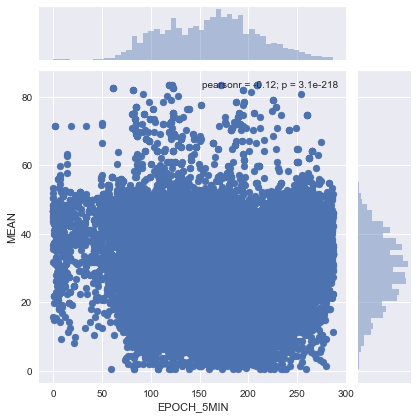

In [41]:
createcharts(TR_Chart_F,0,288,True,Weekday)